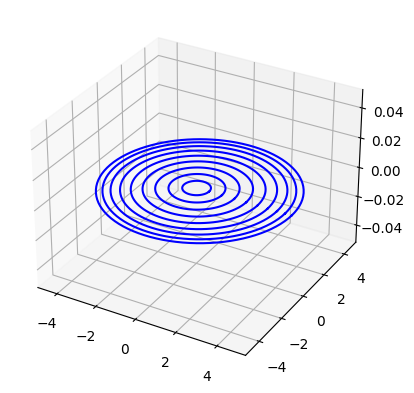

In [2]:
# Import matplotlib for 3D plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define a function to draw a circle in 3D space
def draw_circle(ax, center, radius, color):
    # Create an array of angles from 0 to 2*pi
    theta = np.linspace(0, 2 * np.pi, 100)
    # Calculate the x, y and z coordinates of the circle points
    x = center[0] + radius * np.cos(theta)
    y = center[1] + radius * np.sin(theta)
    z = center[2] * np.ones_like(theta)
    # Plot the circle on the given axis with the given color
    ax.plot(x, y, z, color=color)

# Create a figure and an axis for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the wire tip position and orientation
wire_tip = (0, 0, 0) # The wire tip is at the origin
wire_dir = (1, 0 ,0) # The wire direction is along the x-axis

# Define the frequency and amplitude of the alternating current
freq = 50 # The frequency is 50 Hz
amp = 5 # The amplitude is 5 cm

# Define the colors for positive and negative cycles
pos_color = 'blue'
neg_color = 'red'

# Define the number of cycles to simulate
num_cycles = 10

# Loop over each cycle
for i in range(num_cycles):
    # Calculate the phase angle of the current at this cycle
    phi = i * 2 * np.pi / freq 
    # Calculate the current magnitude at this cycle
    curr_mag = amp * np.sin(phi)
    # Determine the color of the circle based on the sign of curr_mag 
    if curr_mag > 0:
        circle_color = pos_color 
    elif curr_mag < 0:
        circle_color = neg_color 
    else:
        continue # Skip this cycle if curr_mag is zero
    
    # Calculate the center of the circle at this cycle 
    circle_center = (wire_tip[0] + wire_dir[0] * i / freq,
                     wire_tip[1] + wire_dir[1] * i / freq,
                     wire_tip[2] + wire_dir[2] * i / freq)
    
    # Draw a circle with curr_mag as radius and circle_color as color 
    draw_circle(ax, circle_center, abs(curr_mag), circle_color)

# Show the plot 
plt.show()